![alt text](neurons.png)

In [9]:
#Q1 neurons code 



# Base class: General Neuron
class Neuron:
    def __init__(self, firing_rate=0.0):
        self.firing_rate = firing_rate

    def activate(self, stimulus_strength):
        """Calculates firing rate based on stimulus strength."""
        self.firing_rate = stimulus_strength * 0.5  # Example calculation
        print(f"Neuron activated with firing rate: {self.firing_rate}")


# Intermediate class: Sensory Neuron
class SensoryNeuron(Neuron):
    def __init__(self, firing_rate=0.0, receptor_type=""):
        super().__init__(firing_rate)
        self.receptor_type = receptor_type

    def sense_stimulus(self, stimulus_strength):
        """Processes the specific stimulus it is sensitive to."""
        print(f"Sensing {self.receptor_type} stimulus with strength {stimulus_strength}")
        self.activate(stimulus_strength)


# Intermediate class: Motor Neuron
class MotorNeuron(Neuron):
    def __init__(self, firing_rate=0.0, target_muscle=""):
        super().__init__(firing_rate)
        self.target_muscle = target_muscle

    def control_muscle(self, activation_level):
        """Controls the target muscle based on activation level."""
        print(f"Controlling {self.target_muscle} with activation level: {activation_level}")
        self.firing_rate = activation_level


# Leaf class: Photoreceptor
class Photoreceptor(SensoryNeuron):
    def __init__(self, firing_rate=0.0):
        super().__init__(firing_rate, receptor_type="light")

    def detect_light(self, light_intensity):
        """Unique behavior for light detection."""
        print(f"Detecting light intensity: {light_intensity}")
        self.activate(light_intensity * 1.2)  # Enhanced sensitivity to light


# Leaf class: Mechanoreceptor
class Mechanoreceptor(SensoryNeuron):
    def __init__(self, firing_rate=0.0):
        super().__init__(firing_rate, receptor_type="pressure")

    def detect_pressure(self, pressure_level):
        """Unique behavior for pressure detection."""
        print(f"Detecting pressure level: {pressure_level}")
        self.activate(pressure_level * 0.8)  # Sensitivity to pressure


# Leaf class: Alpha Motor Neuron
class AlphaMotorNeuron(MotorNeuron):
    def __init__(self, firing_rate=0.0):
        super().__init__(firing_rate, target_muscle="skeletal muscle")

    def skeletal_muscle_control(self, activation_level):
        """Unique control for skeletal muscle."""
        print(f"Initiating rapid contraction for {self.target_muscle}")
        self.control_muscle(activation_level * 1.5)  # Strong rapid contractions


# Leaf class: Gamma Motor Neuron
class GammaMotorNeuron(MotorNeuron):
    def __init__(self, firing_rate=0.0):
        super().__init__(firing_rate, target_muscle="muscle spindle")

    def muscle_spindle_control(self, activation_level):
        """Unique control for muscle spindles."""
        print(f"Adjusting tension for {self.target_muscle}")
        self.control_muscle(activation_level * 0.7)  # Slower, gradual response



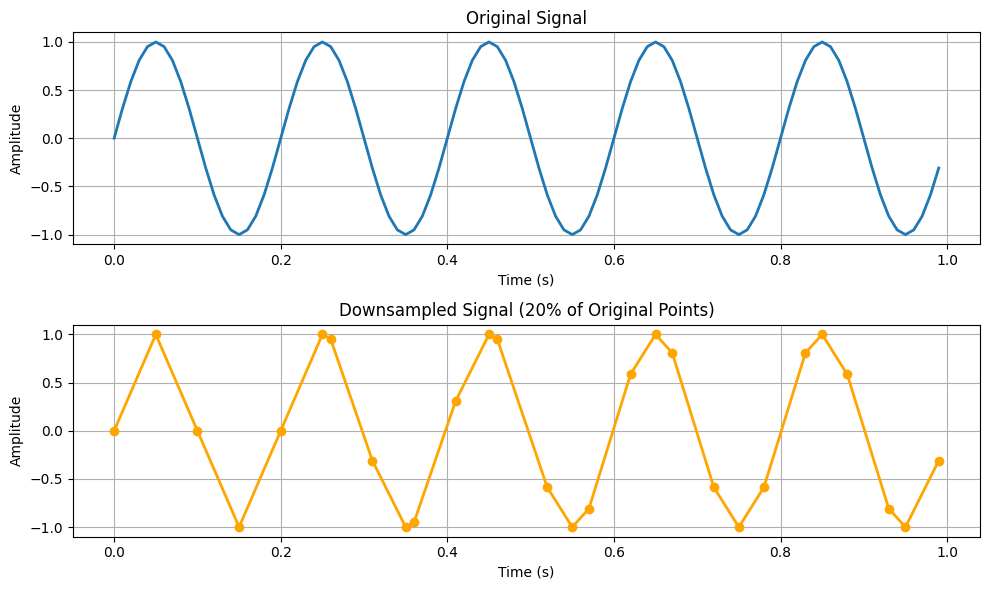

In [15]:
#Q2 sinusidial signal 

import numpy as np
import matplotlib.pyplot as plt

def downsample_signal(signal, target_percentage):
    """
    Downsamples a sinusoidal signal while preserving all maxima and minima points.

    """
    # Find maxima and minima
    maxima_indices = (np.diff(np.sign(np.diff(signal))) < 0).nonzero()[0] + 1
    minima_indices = (np.diff(np.sign(np.diff(signal))) > 0).nonzero()[0] + 1
    extrema_indices = np.sort(np.concatenate((maxima_indices, minima_indices)))

    #  points to retain
    target_points = int(len(signal) * target_percentage)

    # Select points evenly spaced, including extrema
    evenly_spaced_indices = np.linspace(0, len(signal) - 1, target_points, dtype=int)
    selected_indices = np.unique(np.sort(np.concatenate((extrema_indices, evenly_spaced_indices))))

    return selected_indices, signal[selected_indices]


if __name__ == "__main__":
    #  sinusoidal signal
    t = np.arange(0, 1, 0.01)  # 0 to 1 seconds,  every 0.01 seconds
    frequency = 5  # Frequency 5 Hz
    signal = np.sin(2 * np.pi * frequency * t)

    # Downsample the signal
    target_percentage = 0.2  #  20% of points
    indices, downsampled_signal = downsample_signal(signal, target_percentage)

    # Plot original signal
    plt.figure(figsize=(10, 6))
    plt.subplot(2, 1, 1)
    plt.plot(t, signal, label="Original Signal", linewidth=2)
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.title("Original Signal")
    plt.grid()
    

    # Plot downsampled signal
    plt.subplot(2, 1, 2)
    plt.plot(t[indices], downsampled_signal, 'o-', label="Downsampled Signal", linewidth=2, color='orange')
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.title("Downsampled Signal (20% of Original Points)")
    plt.grid()



    plt.tight_layout()
    plt.show()


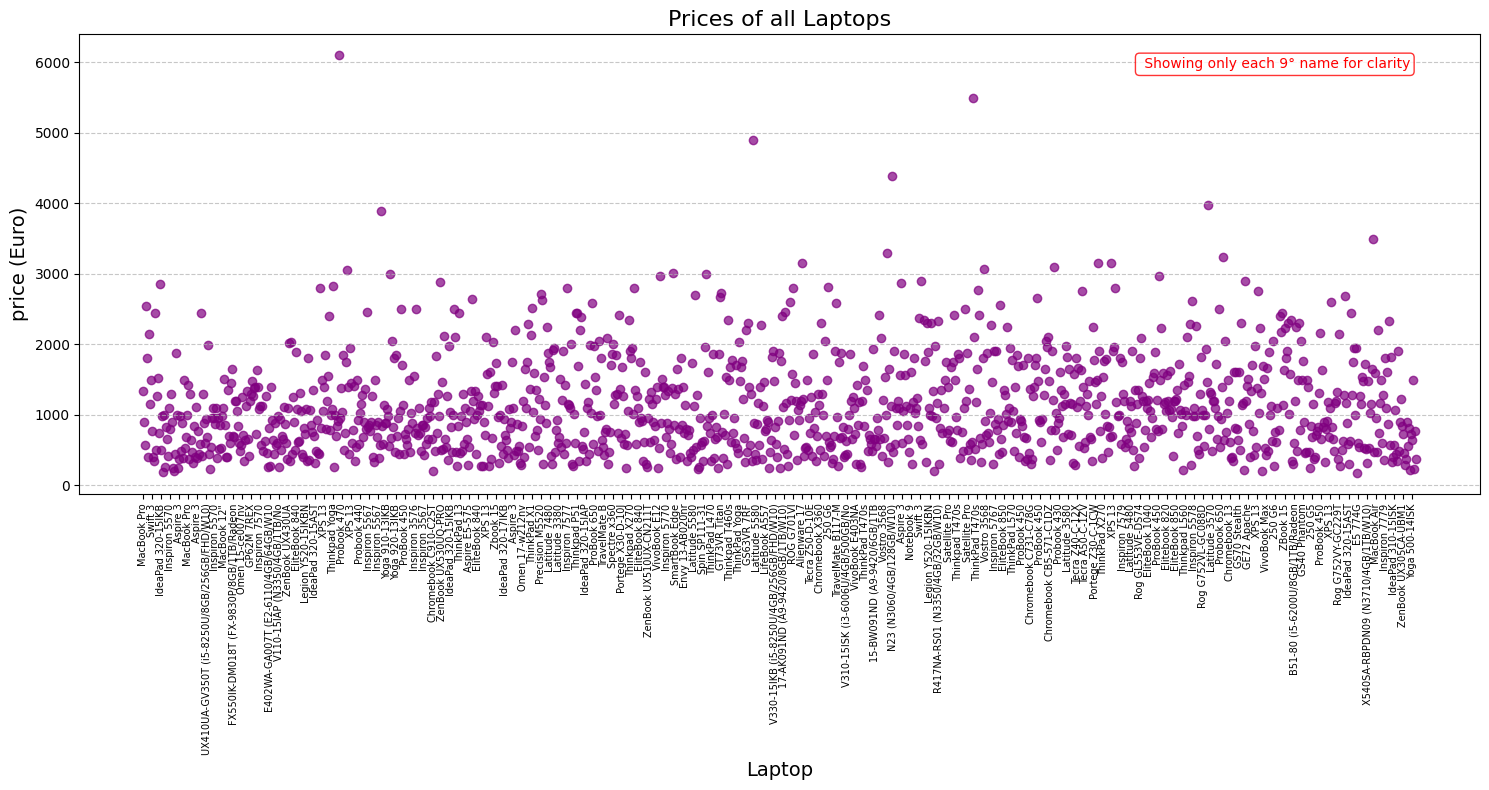

Average laptop price for each company:
Acer: 633.46 Euros
Apple: 1544.46 Euros
Asus: 1117.70 Euros
Chuwi: 314.30 Euros
Dell: 1174.94 Euros
Fujitsu: 729.00 Euros
Google: 1677.67 Euros
HP: 1065.83 Euros
Huawei: 1424.00 Euros
LG: 2099.00 Euros
Lenovo: 1093.86 Euros
MSI: 1712.90 Euros
Mediacom: 295.00 Euros
Microsoft: 1612.31 Euros
Razer: 3346.14 Euros
Samsung: 1413.44 Euros
Toshiba: 1267.81 Euros
Vero: 217.43 Euros
Xiaomi: 1133.46 Euros

Company with the most expensive laptops on average:
Razer with an average price of 3346.14 Euros

Operatin systems:
['MacOS' 'No OS' 'Windows' 'Linux' 'Android' 'Chrome']


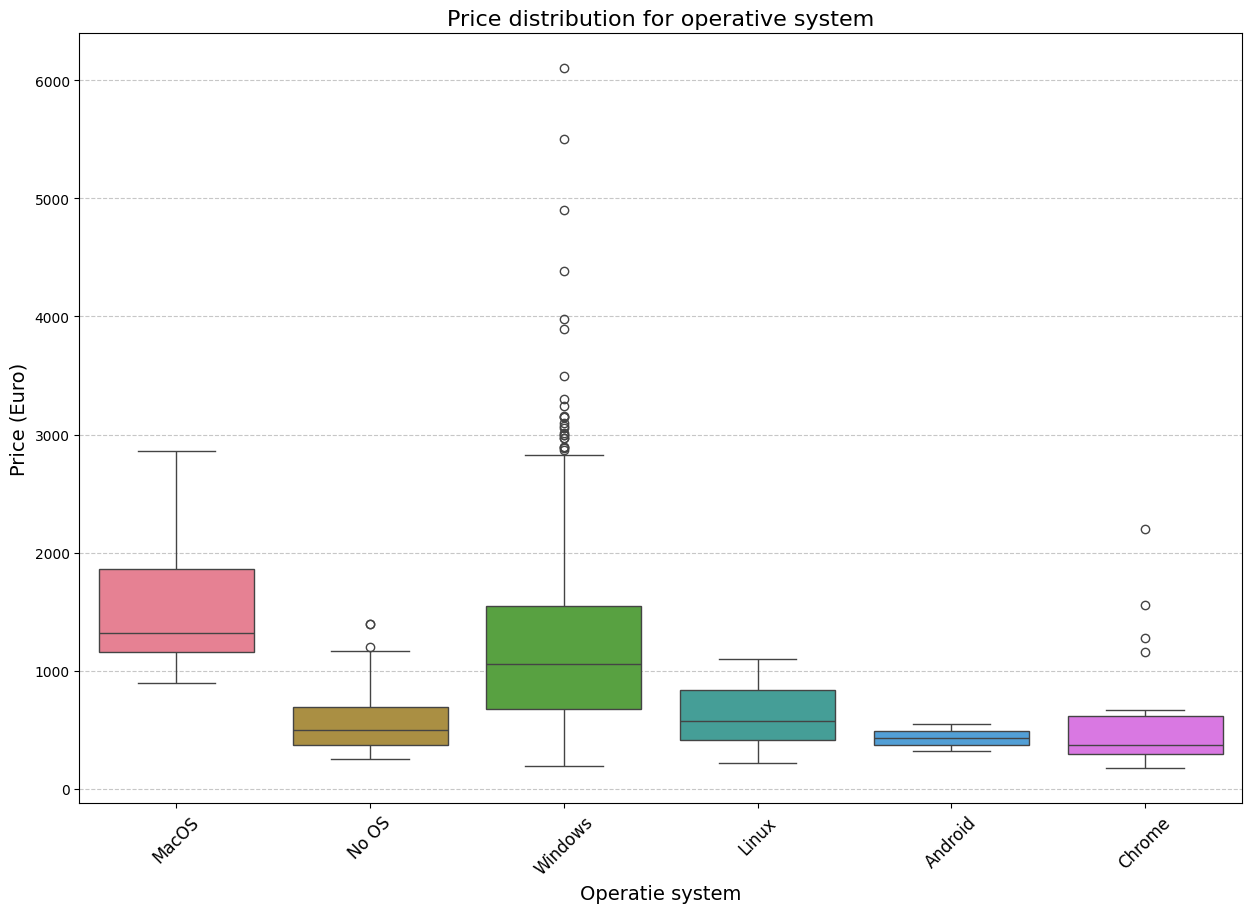

Pearson coeficient (r): 0.74
there is a significan correlation between RAM and price.


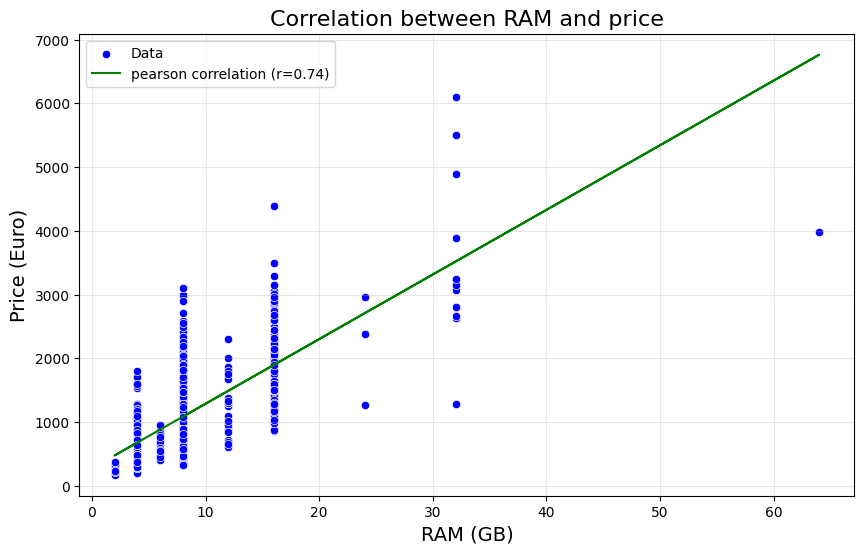

soce of data  DataFrame: 1265
                   Memory   Storage type
0               128GB SSD            SSD
1     128GB Flash Storage  Flash Storage
2               256GB SSD            SSD
3               512GB SSD            SSD
4               256GB SSD            SSD
...                   ...            ...
1270            128GB SSD            SSD
1271            512GB SSD            SSD
1272   64GB Flash Storage  Flash Storage
1273              1TB HDD            HDD
1274            500GB HDD            HDD

[1265 rows x 2 columns]
The most popular CPU company is 'Intel' with 1204 laptops.


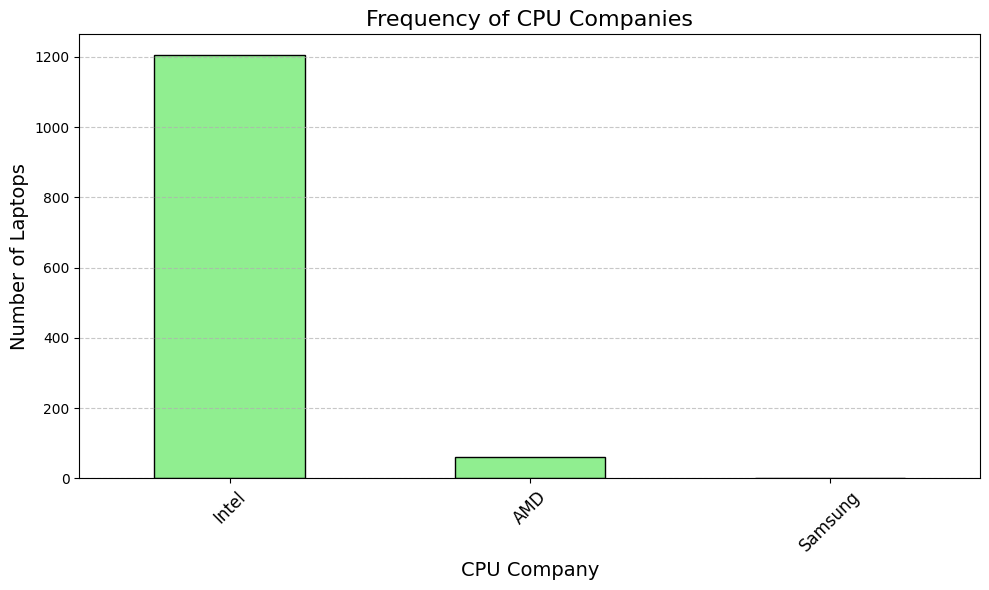

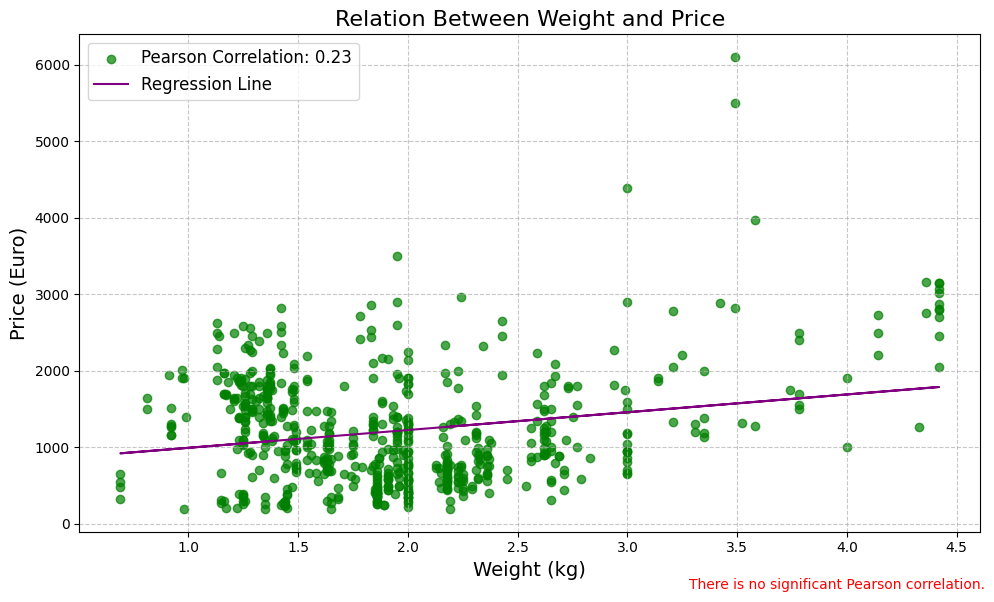

In [14]:
#Q3 Laptop prices analisis 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#import file 
file_path = r"C:\Users\matzk\Python\advance-python-\laptop_price - dataset.xlsx"

# Read the file
data = pd.read_excel(file_path)

# convert column 'Price (Euro)' to number and eliminates no valid values
data['Price (Euro)'] = pd.to_numeric(data['Price (Euro)'], errors='coerce')

data = data.dropna(subset=['Price (Euro)'])

# 1
# column product as axis x
x_labels = data['Product']

# graph
plt.figure(figsize=(15, 8))
plt.scatter(x_labels.index, data['Price (Euro)'], alpha=0.7, c='purple')
plt.title('Prices of all Laptops', fontsize=16)
plt.xlabel('Laptop', fontsize=14)
plt.ylabel('price (Euro)', fontsize=14)

# x-axis is overcrowded because we have a lot of data, I displaed fewer labels while retaining all data points in the graph  to avoid cluttering
step = 9  # Display a label for every 9 laptops
plt.xticks(ticks=x_labels.index[::step], labels=x_labels[::step], rotation=90, fontsize=7)

plt.text(
    0.95, 0.95,
    f" Showing only each {step}° name for clarity",
    fontsize=10,
    color="red",
    transform=plt.gca().transAxes,
    ha="right",
    va="top",
    bbox=dict(boxstyle="round,pad=0.3", edgecolor="red", facecolor="white", alpha=0.8)
)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 2
# Calculate the average laptop price for each company
average_prices = data.groupby('Company')['Price (Euro)'].mean()

# Find the company with the most expensive laptops on average
most_expensive_company = average_prices.idxmax()
highest_avg_price = average_prices.max()

print("Average laptop price for each company:")
for company, price in average_prices.items():
    print(f"{company}: {price:.2f} Euros")

print("\nCompany with the most expensive laptops on average:")
print(f"{most_expensive_company} with an average price of {highest_avg_price:.2f} Euros")


# 3
# make names uniform
def clean_opsys(os):
    os = os.lower()

    if "windows" in os:
        return "Windows"
    elif "mac" in os:
        return "MacOS"
    elif "linux" in os:
        return "Linux"
    elif "no os" in os or "dos" in os:
        return "No OS"
    elif "android" in os:
        return "Android"
    else:
        return "Chrome"

    #  clean column


data['OpSys_Cleaned'] = data['OpSys'].apply(clean_opsys)
unique_opsys = data['OpSys_Cleaned'].unique()

print("\nOperatin systems:")
print(unique_opsys)

# 4
# colors
palette = sns.color_palette("husl", n_colors=len(data['OpSys_Cleaned'].unique()))

plt.figure(figsize=(15, 10))
sns.boxplot(x='OpSys_Cleaned', y='Price (Euro)', data=data, palette=palette,
            hue='OpSys_Cleaned', order=data['OpSys_Cleaned'].unique(), legend=False)
plt.title('Price distribution for operative system', fontsize=16)
plt.xlabel('Operatie system', fontsize=14)
plt.ylabel('Price (Euro)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 5
# RAM colum to number
data['RAM (GB)'] = pd.to_numeric(data['RAM (GB)'], errors='coerce')

# take out invalid valeus
data = data.dropna(subset=['Price (Euro)', 'RAM (GB)'])

# person correlation calculation (numpy)
correlation_matrix = np.corrcoef(data['RAM (GB)'], data['Price (Euro)'])
correlation = correlation_matrix[0, 1]

print(f"Pearson coeficient (r): {correlation:.2f}")
if abs(correlation) > 0.4:
    print("there is a significan correlation between RAM and price.")
else:
    print("there is not a significan correlation between RAM and price.")

# graph
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['RAM (GB)'], y=data['Price (Euro)'], color='blue', label='Data')

if abs(correlation) > 0.2:
    m, b = np.polyfit(data['RAM (GB)'], data['Price (Euro)'], 1)
    plt.plot(data['RAM (GB)'], m * data['RAM (GB)'] + b, color='green',
             label=f'pearson correlation (r={correlation:.2f})')

plt.title('Correlation between RAM and price', fontsize=16)
plt.xlabel('RAM (GB)', fontsize=14)
plt.ylabel('Price (Euro)', fontsize=14)
plt.grid(alpha=0.3)
plt.legend()
plt.show()


# 6
# Creates new colunm "Storage type" fm memory column
def extract_storage_type(memory):
    # chek memory type
    memory = str(memory).lower()
    if 'ssd' in memory:
        return 'SSD'
    elif 'hdd' in memory:
        return 'HDD'
    else:
        return 'Flash Storage'

    # apply function


data['Storage type'] = data['Memory'].apply(extract_storage_type)

print(f'soce of data  DataFrame: {len(data)}')
print(data[['Memory', 'Storage type']])

'''BONUS'''

# 1
# Count the frequency of each CPU company
cpu_counts = data['CPU_Company'].value_counts()

# Most popular CPU company
most_popular_cpu = cpu_counts.idxmax()
most_popular_count = cpu_counts.max()

print(f"The most popular CPU company is '{most_popular_cpu}' with {most_popular_count} laptops.")

# histogram of CPU companies
plt.figure(figsize=(10, 6))
cpu_counts.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Frequency of CPU Companies', fontsize=16)
plt.xlabel('CPU Company', fontsize=14)
plt.ylabel('Number of Laptops', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 2
#  columns to numbers
data['Weight (kg)'] = pd.to_numeric(data['Weight (kg)'], errors='coerce')

# Filter out rows with weight greater than 6 kg
data = data[(data['Weight (kg)'] <= 6) & (data['Weight (kg)'].notna()) & (data['Price (Euro)'].notna())]

# Calculate Pearson correlation
correlation = np.corrcoef(data['Weight (kg)'], data['Price (Euro)'])[0, 1]

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data['Weight (kg)'], data['Price (Euro)'], alpha=0.7, c='green',
            label=f'Pearson Correlation: {correlation:.2f}')
plt.title('Relation Between Weight and Price', fontsize=16)
plt.xlabel('Weight (kg)', fontsize=14)
plt.ylabel('Price (Euro)', fontsize=14)
plt.grid(alpha=0.7, linestyle='--')

#  regression line
m, b = np.polyfit(data['Weight (kg)'], data['Price (Euro)'], 1)
plt.plot(data['Weight (kg)'], m * data['Weight (kg)'] + b, color='purple', label='Regression Line')

plt.figtext(0.99, 0.01, 'There is no significant Pearson correlation.',
            horizontalalignment='right', fontsize=10, color='red')

#  legend
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()



BONUS QUESTIONS 

Witch company has the wider range in price?----    Do whiskers graph with the prices divided by company 

Witch company have the most products?----	Count the number of products that each company have and do a histogram 

Relation between price and size   ----Scatterplot Pearson correlation 

Relation between weight and price ----	Scatterplot pearson 

Relation between weight and company----	Scatterplot Pearson correlation

Relation between size and ram ----	Scatterplot Pearson correlation 

Which is the most popular GPU company?------	Histogram of each GPU company (x axis) and how many laptops use it (y) 